# Gráficos

## Librerías para gráficos en Python
- La más utilizada es `matplotlib`, y otras como `seaborn` también son compatibles con `matplotlib`, al igual que `pandas`.

### Matplotlib
- La librería de facto para implementar gráficos con Python se conoce como matplotlib, la cual está enfocada a reproducir gráficos estáticos en 2D. También se pueden realizar gráficos en 3D, aún cuando su soporte sea algo limitado.
- Se importa como `import matplotlib.pyplot as plt`.
- Al importar este módulo, tendremos acceso a los componentes básicos, así como especificaciones de los elementos visuales.
- Tiene muchas opciones de configuración. Se puede cargar estilos pre definidos con la forma `plt.style.use("nombre estilo")`.
- Lista de estilos disponibles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html.
- Lista de colores disponibles: https://matplotlib.org/stable/gallery/color/named_colors.html.

In [1]:
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## Histogramas

### Finalidad del histograma

- El histograma nos permite generar una representación _empírica_ de una variable contínua.
- Se genera a partir de una serie de _casillas_ (generalmente definidas por el programa, llamadas "bins" en inglés) que _cuenta_ la cantidad de ocurrencias entre cierto _rango_.
- El eje X representa el rango empírico de valores, el eje Y representa la frecuencia.

In [2]:
import pandas as pd
df = pd.read_csv('qog_std_cs_jan18.csv')
print(df.shape)
df.head()

(194, 1882)


,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


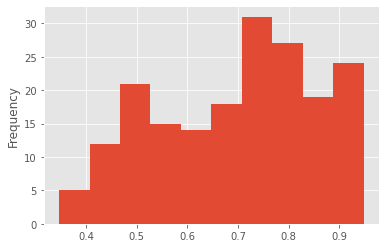

In [3]:
# Graficar histograma mediante pandas, usando .plot()
df["undp_hdi"].plot(kind="hist"); # Se agrega el ";" para omitir la salida

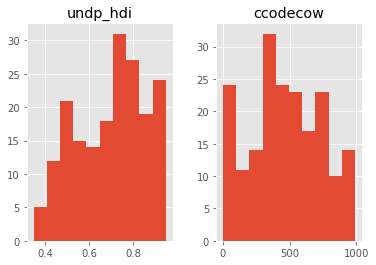

In [4]:
# Se puede generar histogramas para un df completo
df[["undp_hdi", "ccodecow"]].hist();

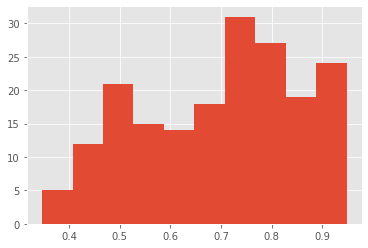

In [5]:
# También se puede usar directamente el método .hist()
df["undp_hdi"].hist();

In [8]:
type(df["undp_hdi"])

pandas.core.series.Series

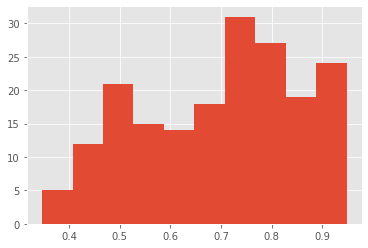

In [6]:
# Usando matplotlib
plt.hist(           # Se llama al método hist
    df["undp_hdi"]  # Se le pasa como argumento el vector, en este caso una Serie, con los valores para construir el histograma
);

- Como `pandas` hace uso de `matplotlib`, los gráficos resultantes son iguales.
- Independiente de la forma utilizada, el método `hist` inferirá de forma automática cuál es la mejor representación de los _bins_ (casillas) para esa variable.
- Dado que el eje X detalla el rango de valores que consideró, el eje Y nos informa sobre la cantidad de casos ocurrentes en el rango de valores.

### Relevancia de los datos perdidos

- Una buena práctica es asegurarse que las variables no contengan datos perdidos.
- Para inspeccionar los datos perdidos de una variable podemos implementar la siguiente línea de código: `df["undp_hdi"].isnull()`
- Dependiendo de la cantidad de datos perdidos, podemos ignorarlos o pensar en alguna estrategia de imputación. 
- En las versiones actuales, `matplotlib` _elimina_ los datos perdidos de los datos utilizados para graficar (solo al momento de graficar, no permanentemente).

In [9]:
# Se agrega "sum" para que sume la cantidad de nulos
df["undp_hdi"].isnull().sum()

8

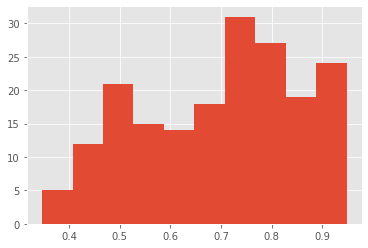

In [12]:
# Si primero se elimina los nulos manualmente, se obtiene el mismo gráfico
plt.hist(df["undp_hdi"].dropna());

### Visualizando medias
- Si bien el histograma informa sobre la cantidad de ocurrencias, podemos hacerlo aún más informativo al incluir las medias.
- La inclusión de medias en el gráfico nos permite evaluar cuántas observaciones se sitúan bajo o sobre la media global.

In [13]:
# Pandas por defecto elimina los datos nulos antes de calcular los estadísticos
assert df["undp_hdi"].dropna().mean() == df["undp_hdi"].mean()

- Para graficar una línea vertical en un valor determinado del eje x, se utiliza el método `axvline`.
- Cada llamado a `plt` funciona como _una capa_ adicional que se agrega al lienzo del gráfico.

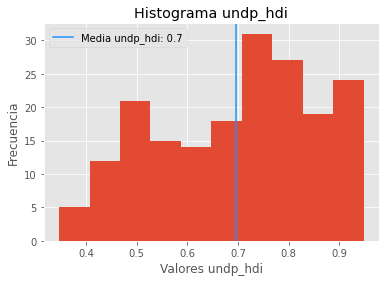

In [17]:
# Se almacena la media
media_undp_hdi = df["undp_hdi"].mean()

# Primera capa: Histograma
plt.hist(df["undp_hdi"])                                 # Primero se grafica el histograma

# Segunda capa: Línea vertical de la media
plt.axvline(                                             # Luego, "sobre el histograma", se grafica la línea de la media
    media_undp_hdi,                                      # Como primer argumento, recibe el valor del eje x donde se dibujará la línea vertical
    color="dodgerblue",                                  # Se indica además el color de la línea
    label=f"Media undp_hdi: {round(media_undp_hdi, 2)}"  # Se agrega además el texto que aparecerá en la leyenda
)

# Adicionales
plt.title("Histograma undp_hdi")                         # Con plt.title se agrega el título al gráfico
plt.xlabel("Valores undp_hdi")                           # Con plt.xlabel se agrega etiqueta del eje x
plt.ylabel("Frecuencia")                                 # Con plt.ylabel se agrega etiqueta del eje y
plt.legend();                                            # Se indica que se debe mostrar la leyenda. 

- Otra variante son los dotplots, que permiten desagregar el comportamiento de una variable, condicional a la pertenencia de las observaciones. Esto lo podemos lograr mediante:

In [18]:
# Con groupby logramos generar representaciones internas del dataframe
group_hdi_mean = df.groupby(['ht_region'])['undp_hdi'].mean()
group_hdi_mean

ht_region
1     0.780679
2     0.721500
3     0.748300
4     0.508813
5     0.902360
6     0.817000
7     0.695545
8     0.605125
9     0.643000
10    0.741154
Name: undp_hdi, dtype: float64

In [24]:
df["ht_region"][:5]

0    8
1    1
2    3
3    5
4    4
Name: ht_region, dtype: int64

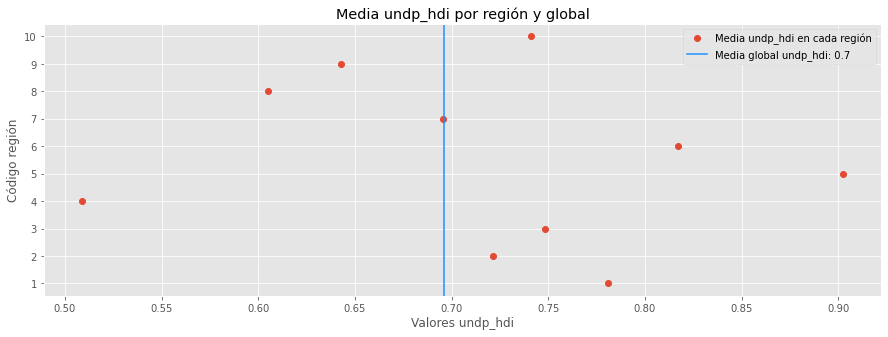

In [22]:
# Esto nos permite ajustar el tamaño del gráfico
plt.figure(
    figsize=(15, 5) # El parámetro figsize recibe una tupla con el ancho (en pulgadas) y el alto (en pulgadas) del gráfico
)

# Dado que el retorno es una serie, podemos acceder a sus valores e índices
plt.plot(                                 # Al usar el método genérico "plot" de matplotlib, intentará por defecto hacer un gráfico de línea
    group_hdi_mean.values,                # Se indica como primer argumento los valores del eje X, que son los valores medios de undp_hdi de cada región
    group_hdi_mean.index,                 # Se agrega los valores del eje Y, los números por los que se representa cada región
    'o',                                  # Se indica el "tipo de marcador" para el cruce de datos, en este caso "o" para hacer un "dotplot" (Ver docu)
    label="Media undp_hdi en cada región" # Se agrega etiqueta para los dots
)

# Se pasa explícitamente los valores del eje Y a las etiquetas del eje Y (yticks) para que los incluya todos
plt.yticks(group_hdi_mean.index)

# Se grafica la media
plt.axvline(media_undp_hdi, color="dodgerblue", label=f"Media global undp_hdi: {round(media_undp_hdi, 2)}" ) 

# Extras
plt.title("Media undp_hdi por región y global")                       
plt.xlabel("Valores undp_hdi")                 
plt.ylabel("Código región")                 
plt.legend();                 

## El Histograma no es lo mismo que el Gráfico de Barras
- El gráfico de barras (preferible al gráfico de torta) se utiliza para mostrar frecuencias de _valores puntuales_.

In [25]:
df["ht_region"].value_counts()

4     49
1     28
5     27
3     20
2     20
10    13
9     12
7     11
8      8
6      6
Name: ht_region, dtype: int64

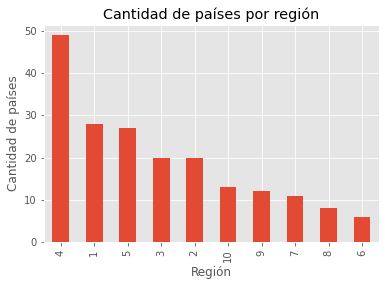

In [26]:
# Con pandas, se puede hacer fácilmente usando value_counts
df["ht_region"].value_counts().plot(kind="bar") # "bar" las barras son verticales, y "barh" las barras son horizontales
plt.title("Cantidad de países por región")
plt.xlabel("Región")
plt.ylabel("Cantidad de países");

# Variables aleatorias

**Definición Wikipedia**:
- _"En probabilidad y estadística, una variable aleatoria es una **función** que **asigna un valor, usualmente numérico**, al resultado de un experimento aleatorio. (...) Las variables aleatorias suelen tomar valores reales, pero se pueden considerar valores aleatorios como valores lógicos, funciones o cualquier tipo de elementos (de un espacio medible). "_

<a href="https://es.wikipedia.org/wiki/Variable_aleatoria">Enlace wiki</a>

- Sucede que los valores de nuestro _espacio muestral_ pueden ser "cualquier cosa":
<table>
  <tr>
    <th width="15%">Experimento aleatorio</th>
    <th width="85%">Espacio muestral</th>
  </tr>
  <tr>
    <td>Lanzamiento de una moneda</td>
    <td>$\Omega = \{ \text{Cara}, \text{Sello} \}$</td>
  </tr>
  <tr>
    <td>Reyes que inicien una batalla</td>
    <td>$\Omega = \{ \text{Joffrey/Tommen Baratheon}, \text{Rob Stark}, \text{Balon/Eulon Greyjoy}, \text{Stannis Baratheon} \}$</td>
  </tr>
</table>

- La variable aleatoria (normalmente denotada $X$) toma los _elementos_ del espacio muestral, y los transforma en _números_. Estos números dan el _rango_ de la variable aleatoria, que corresponde al _recorrido_ de la función (normalmente denotado $R_x$). 
    - $X: \Omega \rightarrow \mathbb{R}$. Esto se lee como "La variable aleatoria mapea valores desde el espacio muestral hacia los números reales".
    
<table>
  <tr>
      <th width="15%">Experimento aleatorio</th>
      <th width="50%">Espacio muestral</th>
      <th width="20%">Variable aleatoria</th>
      <th width="15%">Rango</th>
  </tr>
  <tr>
      <td>Lanzamiento de una moneda</td>
      <td>$\Omega = \{ \text{Cara}, \text{Sello} \}$</td>
      <td>$X: \Omega \rightarrow \mathbb{R}$
          <li>Cara $\rightarrow$ 1</li>
          <li>Sello $\rightarrow$ 2</li>
      </td>
      <td>$R_x=\{1, 2 \}$</td>
  </tr>
  <tr>
      <td>Reyes que inicien una batalla</td>
      <td>$\Omega = \{ \text{Joffrey/Tommen Baratheon}, \text{Rob Stark}, \text{Balon/Eulon Greyjoy}, \text{Stannis Baratheon} \}$</td>
      <td>$X: \Omega \rightarrow \mathbb{R}$
          <li>Joffrey/Tommen Baratheon $\rightarrow$ 1</li>
          <li>Rob Stark $\rightarrow$ 2</li>
          <li>Balon/Eulon Greyjoy $\rightarrow$ 3</li>
          <li>Stannis Baratheon $\rightarrow$ 4</li>
      </td>
      <td>$R_x=\{1, 2, 3, 4 \}$</td>
  </tr>
</table>

### ¿Qué es una variable aleatoria?

- Proveen una descripción sobre cómo se comporta un proceso de generación de datos.
- Hablamos de aleatoriedad cuando no tenemos certeza sobre el comportamiento de cada evento específico.
- Existen dos grandes familias de variables aleatorias:
    - **Variables aleatorias discretas**: Su rango corresponde a números discritos, "contables" (se pueden graficar en un gráfico de barras).
    - **Variables aleatorias continuas**: Su rango corresponde a números continuos, "no contables", que requieren agruparse en rangos (como en el histograma).

## Formas de describir el valor que toma una variable aleatoria

### Función de probabilidad:
Son funciones matemáticas, que nos permiten obtener la probabilidad de que el valor entregado por una variable aleatoria "caiga" en un valor o rango de valores específicos. Es común que sean _parametrizadas_.

- **Caso variable aleatoria discreta**: Se denota como $P(X=x)$, y corresponde a la _función de masa de probabilidad_ (PMF en inglés). Se caracteriza porque todo elemento del rango de la variable aleatoria tiene una probabilidad de ocurrencia entre 0 y 1, y la suma de las probabilidades de todos los elementos es 1.
    - Ejemplo: Para el caso de la moneda, la probabilidad de Cara (mapeado como 1) es 0.5, y la probabilidad de Sello (mapeado como 2) es 0.5. Ambas probabilidades suman 1.
- **Caso variable aleatoria continua**: Se denota como $f(x)$, y corresponde a la _función de densidad de probabilidad_ (PDF en inglés). Existen infinitos valores posibles que la variable aleatoria puede entregar. En estos casos, la probabilidad correspondiente a un _valor puntual_ es `0`; Se debe por tanto establecer _un rango de valores_ para el cual obtener una probabilidad.
    - Ejemplo: Para el caso de la altura de los alumnos de la academia, la probabilidad de un valor puntual, por ejemplo altura = 1.639484... ... es cero; Se debe buscar la probabilidad, por ejemplo, "de tener una altura mayor a 1.6".
<br />
<br />
Video recomendado: <a href="https://www.youtube.com/watch?v=ZA4JkHKZM50">¿Por qué "probabilidad igual a 0" no significa "imposible"?</a> (solo en inglés :( )
<br />
<br />

#### Toda función de probabilidad tiene una _distribución_, que se visualiza en _gráficos_:
  - La variable aleatoria continua tiene infinitos valores posibles, por lo que se grafica con _curvas_ (como hiciéramos tomáramos un histograma con muchos _bins_ en una muestra muy grande), donde el área bajo la curva del gráfico de densidad es 1.
  - La variable aleatoria discreta se grafica con gráficos de _barras_.
  - En ambos casos, en el eje Y se indica la _probabilidad_.
  
 <img src="https://tinyheero.github.io/assets/prob-distr/overview-prob-distr.png" />
 
 Fuente imagen: Figure 6A.15 (Pg 61) de <a href="https://pages.stern.nyu.edu/~adamodar/pdfiles/papers/probabilistic.pdf">Probabilistic approaches to risk by Aswath Damodaran</a>.

### Función de distribución (CDF en inglés): 
 - Es distinta a la función de probabilidad, y aplica tanto a variables aleatorias continuas como discretas.
 - Toma todas las probabilidades desde el mínimo de la función hasta un punto de corte, y las suma (_es una función acumulada_).
 - También es una probabilidad, por lo que sus valores también están entre 0 y 1.
 
 <img src="http://ai-ml-analytics.com/wp-content/uploads/2020/06/feature-scaled.jpg" width="50%"/>

## Variables Aleatorias Continuas

### Distribución Normal

- Miembro de la familia exponencial
- Permite aproximar una serie de fenómenos tales como altura, peso, coeficiente intelectual.
- Es probablemente una de las distribuciones más utilizadas.
- También presenta una serie de características deseables que facilitan el posterior trabajo de inferencia estadística.
- Depende de dos _parámetros_:
    - Media: $\mu \in \mathbb{R}$. En las funciones de densidad de Python corresponde al parámetro `loc`.
    - Varianza: $\sigma^2 \in \mathbb{R}_{>0}$. En las funciones de densidad de Python, su raíz corresponde al parámetro `scale`.
- Se denota como $\sim \mathcal{N}(\mu, \sigma^2)$

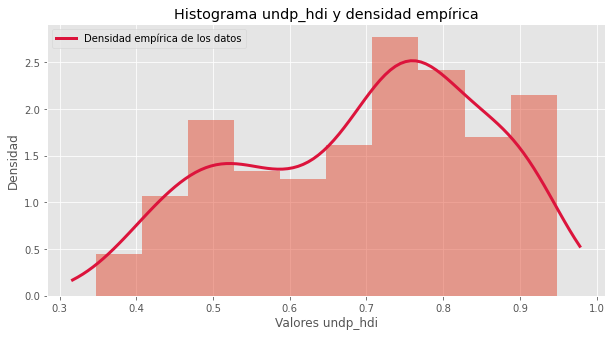

In [28]:
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(10,5))

# Graficamos el mismo histograma, especificando density=True para que el histograma represente densidades y no frecuencias
plt.hist(df["undp_hdi"], density=True, alpha=0.5)

# Extraemos los límites del eje x del histograma (valores de undp_hdi)
x_min, x_max = plt.xlim()

# Utilizandos los límites del histograma para crear un arreglo (lista) de 100 valores entre los valores obtenidos previamente
x_axis = np.linspace(x_min, x_max, 100)

# Graficamos la curva de densidad empirica (la que tienen los datos), que permite comparar directamente con la curva de densidad teorica (la que tiene en este caso la distribución normal)
gauss_kde = stats.gaussian_kde(df["undp_hdi"].dropna())                                # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)                                      # Reshape permite cambiar las dimensiones de una matriz reordenando sus elementos
plt.plot(x_axis, Z, color='crimson', lw=3, label="Densidad empírica de los datos")  # Curva de densidad empírica

# Extras
plt.title("Histograma undp_hdi y densidad empírica")
plt.xlabel("Valores undp_hdi") 
plt.ylabel("Densidad") # En este caso el eje Y es densidad, no frecuencia
plt.legend();

- Si asumimos que los datos de `undp_hdi` provienen de una distribución normal, podemos tomar su media ($\bar X$, estimador de $\mu$) y su varianza ($S^2$, estimador de $\sigma^2$) para _**generar valores**_ de la _distribución teórica_ de probabilidad de los datos.

In [29]:
media = np.mean(df["undp_hdi"])            # Al recibir una Serie de pandas, numpy elimina los nulos para el cálculo de los estadísticos
varianza = np.var(df["undp_hdi"], ddof=1)  # Explicitamos 1 grado de libertat

print(f"El promedio de los datos es {round(media, 3)}, y su varianza es {round(varianza, 3)}")

El promedio de los datos es 0.696, y su varianza es 0.024


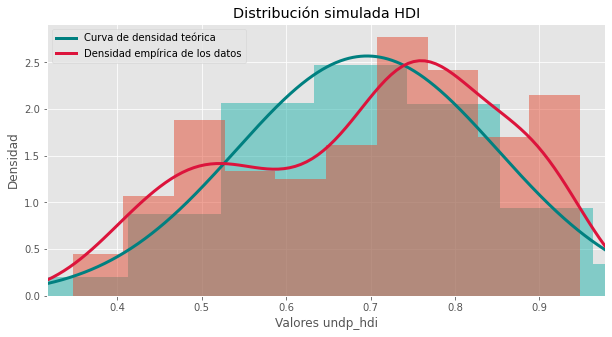

In [16]:
# Fijamos una semilla seudoaleatoria porque haremos uso de una función que genera datos aleatorios en esta celda
np.random.seed(42)

# Generamos datos alatorios con una distribución normal, con los valores de media y varianza obtenidos
sim_data = np.random.normal( # Generaremos datos aleatorios normales
    loc=media,               # En el parámetro 'loc' de la función, debemos entregar el parámetro 'estadistico' 'media'
    scale=np.sqrt(varianza), # En el parámetro 'scale' de la función, debemos entregar el parámetro 'estadístico' que corresponde a la raíx de la varianza (desviación estándar)
    size=1000                # Cantidad de datos a generar
)

# Simulamos cómo debería comportarse un histograma normal.
plt.figure(figsize=(10,5))
plt.hist(sim_data, alpha=.5, density=True, color="lightseagreen")
# Se supoerpone histograma empírico
plt.hist(df["undp_hdi"], density=True, alpha=0.5)
plt.xlim(x_min, x_max) # Fijamos los límites del eje x, según los datos empíricos, para hacer los gráficos comparables en el mismo eje x

# Generamos una lista entre el mínimo y el máximo empírico
x_axis_t = np.linspace(x_min, x_max, 1000)

# Se genera los datos de la función de densidad (pdf) con los parámetros media y varianza obtenidos de los datos empíricos
sim_density = stats.norm.pdf(  # Probability density function de la distribución normal
    x_axis_t,                  # 1000 datos aleatorios entre 2 valores dados
    loc=media,                 # loc corresponde a la media 
    scale=np.sqrt(varianza)    # scale corresponde a la raíz de la varianza
)

# Se grafica la curva teórica de densidad
plt.plot(x_axis_t, sim_density, color='teal', lw=3, label="Curva de densidad teórica")
# Se superpone densidad empírica
plt.plot(x_axis, Z, color='crimson', lw=3, label="Densidad empírica de los datos") 

# Extras
plt.title("Distribución simulada HDI")
plt.xlabel("Valores undp_hdi") 
plt.ylabel("Densidad") # En este caso el eje Y es densidad, no frecuencia
plt.legend();

### Componentes de la distribución normal

- Resulta que ya tenemos conocimiento sobre los primeros dos momentos de una variable.
- Con estos ya estamos en capacidad de aproximarnos al comportamiento de la variable.
- Son dos los componentes a tomar en cuenta:
   - Media
   - Varianza
   
- Función de densidad (PDF):
$$
\begin{align}
f(x|\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2 \pi}} \exp\left(-\frac{(x - \mu)^2}{2\sigma}\right)
\end{align}
$$
    - $exp()$: Corresponde al número $e$ (número de euler), elevado a lo que recibe en el paréntesis.
    
- En Python, podemos hacer uso de la función de densidad mediante la librería `stats` con `stats.norm.pdf`, con un $\mu$ y un $\sigma^2$ dado.
- También podemos _generar datos aleatorios_ pertenecientes a esta distribución con `np.random.normal`, con un $\mu$ y un $\sigma^2$ dado.

### Comportamiento de la Distribución Normal

- Dependiendo de los valores de $\mu$ y $\sigma^2$, se generan distintos comportamientos tanto de la curva de densidad, como de la densidad acumulada.
- En los siguientes gráficos, se usa como referencia una _distribución normal estandarizada_: $\sim \mathcal{N}(0, 1)$ 

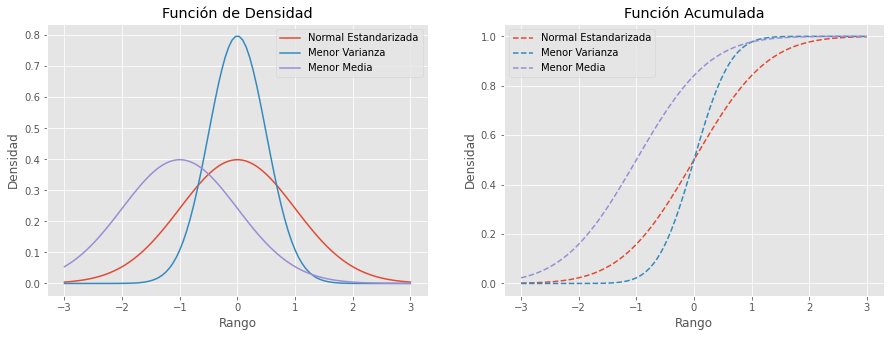

In [30]:
import lec3_graphs as gfx

plt.figure(figsize=(15, 5))
gfx.normal_distributions()

### Posibles aproximaciones a la normal

- Muchas veces _"se requiere"_ que los datos sigan una distribución normal, pero muchas veces esto no es así.
- Para ello, se puede aplicar _transformaciones_ a los datos, para que, luego de la transformación, estos sí sigan una distribución normal.
- Una muy utilizada, es $log(x)$.

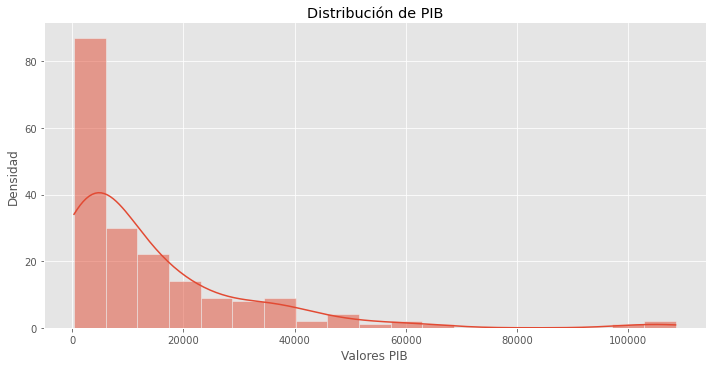

In [31]:
# Importamos otra librería para graficar, seaborn
import seaborn as sns

# Graficamos tanto el histograma como la curva de densidad empírica para la variable pib
sns.displot(           # Accedemos al método distlot de seaborn que permite graficar distribuciones
    df['gle_cgdpc'],   # Como primer argumento damos los datos a graficar
    kde=True,          # Indicamos que deseamos graficar la curva de densidad
    height=5,          # Entrega el alto del gráfico
    aspect=2           # Entrega el ancho del gráfico
);

# Seaborn trabaja por debajo con matplotlib, por lo que podemos agregar todos los métodos de matplotlib que queramos al gráfico
plt.title("Distribución de PIB")
plt.xlabel("Valores PIB") 
plt.ylabel("Densidad"); # En este caso el eje Y es densidad, no frecuencia

- Como la distribución "no es normal", se prueba graficando el logaritmo de los datos

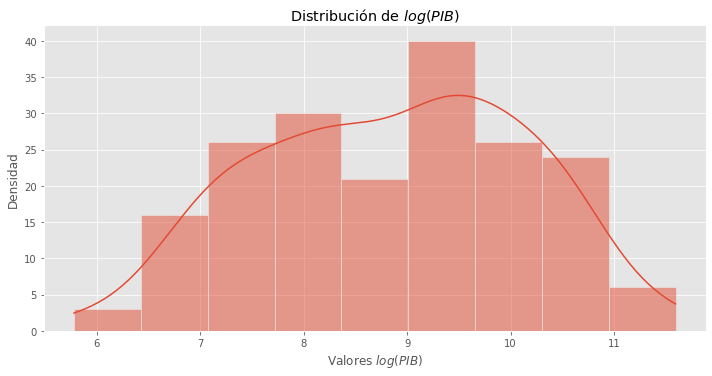

In [32]:
# Se genera una variable con el logaritmo de los PIB. Primero se debe eliminar los datos nulos.
log_pib = np.log(df["gle_cgdpc"].dropna())

# Se grafica la distribución empírica del logaritmo del pib
sns.displot(log_pib, kde=True, height=5, aspect=2);

# Seaborn trabaja por debajo con matplotlib, por lo que podemos agregar todos los métodos de matplotlib que queramos al gráfico
plt.title(r"Distribución de $log(PIB)$")
plt.xlabel(r"Valores $log(PIB)$") 
plt.ylabel("Densidad");

### Distribución normal estandarizada
- Cuando la distribución normal tiene una _media de 0_ y una _varianza de 1_, se conoce como la _distribución normal estandarizada_.
- Dado su afabilidad para ser interpretada, cabe resaltar sus características más importantes:
    - Es _unimodal_, lo que implica que tiene sólo un punto que es el más alto, donde se concentran la mayoría de los datos.
    - Es _simétrica_ dado que la mayoría de los datos gravitan alrededor de la media.
    - Es _positiva_, por tanto todos los valores (positivos o negativos) tienen una probabilidad $P \geq 0$ de suceder.

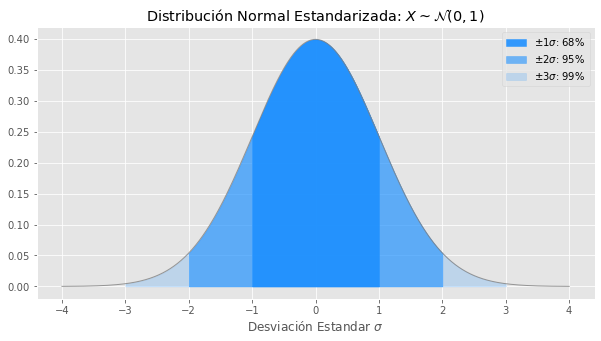

In [20]:
plt.figure(figsize=(10, 5))
gfx.normal_distribution_sigma()

- El 68% de los datos se encontrarán entre $\pm 1 \sigma \rightarrow P(\mu - \sigma \leq X \leq \mu + \sigma)$. Esto corresponde al área de azul intenso.
- El 95% de los datos se encontrarán entre $\pm 2 \sigma \rightarrow P(\mu - \sigma \leq X \leq \mu + \sigma)$.
- El 99% de los datos se encontrarán entre $\pm 3 \sigma \rightarrow P(\mu - \sigma \leq X \leq \mu + \sigma)$. Esto corresponde a las colas de la distribución normal, con un azul pálido.

### Puntaje Z
- Permite analizar el comportamiento específico de una observación respecto a la media.
- Nos permite regularizar la comparación entre distintas variables.

$$
\begin{align}
\text{Puntaje z} = \frac{x_i - \bar X}{\sigma}
\end{align}
$$

- El resultado de la operación indica a cuántas desviaciones estándares se encuentra una observación respecto a la media.

In [33]:
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    get_zscore = float((get_point - get_mean) / get_std)
    plt.axvline(get_zscore, ymin = 0, ymax = .1, color='tomato', lw=2)
    plt.annotate(case, xy=(get_zscore + .05, 0.06), color='tomato', rotation=60, ha='center', size = 10)

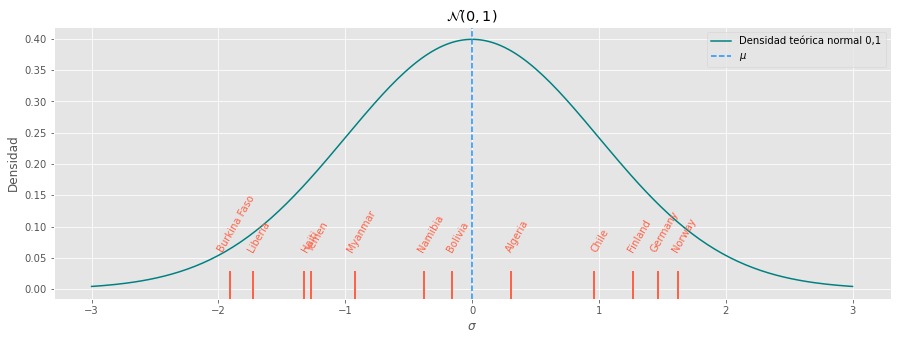

In [34]:
# generamos un array lineal
x_axis = np.linspace(-3, 3, 200)

# simulamos la función de densidad teórica normal(0, 1)
plt.figure(figsize=(15, 5))
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1), color="teal", label="Densidad teórica normal 0,1")

# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--', label=r"$\mu$")

# Pasamos un array de casos a visualizar en un loop, donde para cada elemento de éste array aplicaremos la función point_zscore
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar', 'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia', 'Algeria', 'Namibia', 'Liberia']:
    point_zscore('undp_hdi', i)
    
plt.title(r"$\mathcal{N}(0,1)$")
plt.xlabel(r"$\sigma$") 
plt.ylabel("Densidad")
plt.legend();

## Variables aleatorias discretas
- Nos permite resumir el comportamiento de un fenómeno discreto mediante el conteo.
- La distribución de una variable aleatoria X generalmente se especifica mediante el mapeo de todos los posibles valores y una probabilidad de masa $p(x)$:
$$
\begin{align}
p(x) = p_X{x} = P(X=x)
\end{align}
$$

- Para trabajar estos casos, generaremos una variable aleatoria discreta que indique si un país _es una democracia o no_.
- Para ello, exploramos primero los valores de `gol_inst`

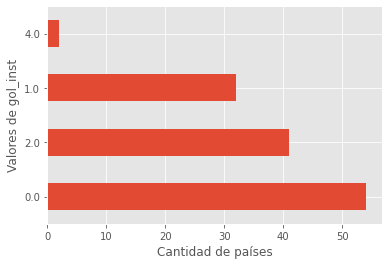

In [35]:
df["gol_inst"].value_counts().plot(kind="barh")
plt.ylabel("Valores de gol_inst")
plt.xlabel("Cantidad de países");

- Generamos la variable discreta utilizando `np.where`

In [36]:
df["democracies"] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')

# Exploramos las probabilidades empíricas
probs_democracy = df["democracies"].value_counts("%")
probs_democracy

Democracia       0.654639
No Democracia    0.345361
Name: democracies, dtype: float64

### Ensayo de Bernoulli
- Sabiendo que existen dos posibles eventos en un espacio muestral finito, el ensayo de Bernoulli es la representación de una iteración del experimento en sí.
- La distribución depende de un parámetro continuo $p \in [0, 1]$ (el parámetro tiene valores entre 0 y 1) que representa la _probabilidad de ocurrencia_.
- Podemos utilizar el módulo `stats` para obtener el comportamiento de un ensayo específico.

In [37]:
from scipy.stats import bernoulli

# Retorna los momentos mu y sigma
mu, sigma = bernoulli.stats(p=probs_democracy.get("Democracia")) # Consideramos "ser democracia" el caso de "éxito", por lo que usamos esa probabilidad
mu, sigma

(array(0.65463918), array(0.22608673))

### Distribución binomial
- Limitante del ensayo de Bernoulli: Ejemplifica el comportamiento de _un_ caso cualquiera en una variable aleatoria.
- Generalmente estamos interesados sobre la distribución de la _tasa_ de éxito o fracaso de un fenómeno discreto, para lo cual usamos la _distribución binomial_.
- Su función de masa de probabilidad corresponde a
$$
\begin{align}
&f(k) = \binom{n}{k} p^k(1-p)^{n-k} \\
&\text{para } k=1, 2, 3... n
\end{align}
$$

    - $k$: Cantidad de éxitos
    - $n$: Cantidad de experimentos de Bernoulli realizados
    - $p$: Probabilidad de éxito
    - $\binom{n}{k}$: Coeficiente binomial, corresponde a $\frac{n!}{k!(n-k)!}$
    
- Su _Esperanza_ (valor esperado) corresponde a $np$.

In [38]:
from scipy.stats import binom

# Se genera la función de masa de probabilidad
prob_democratic_func = binom(
    n=df.shape[0],                          # Consideramos como cantidad de experimentos la cantidad de países, o filas del DataFrame
    p=probs_democracy.get("Democracia")     # Usamos la probabilidad de "ser democracia"
)

# Se obtiene los momentos
mu, sigma = prob_democratic_func.stats()
mu, sigma

(array(127.), array(43.86082474))

- Esto se interepreta como que para 194 ensayos Bernoulli, $n$, _en promedio_, $\mu$, se _espera_ obtener 127 países, $k$, que son democracias.

In [39]:
# Comparamos con el valor esperado np
df.shape[0] * probs_democracy.get("Democracia") 

127.0

In [27]:
# Comparamos con la cantidad de democracias en el set de datos
df["democracies"].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

### Comportamiento de la distribución binomial
- Ya que esta distribución depende de $n$ y $p$, se grafican distintos valores de $n$, dejando $p$ fijo, y distintos valores de $p$, dejando $n$ fijo, para observar el efecto de cada parámetro.

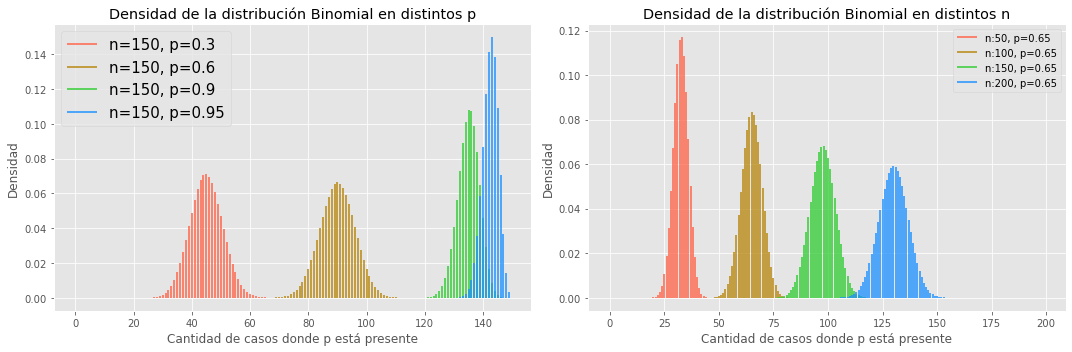

In [40]:
# generamos una lista con cuatro colores
colors = ["tomato", "darkgoldenrod", "limegreen", "dodgerblue"]

# Definimos un número de experimentos
n = 150

plt.figure(figsize=(15, 5))

# Graficamos el primer elemento de una grilla de 1 fila y 2 columnas
plt.subplot(1, 2, 1)
# iniciamos un loop para índices y valores de probabilidad
for i, prob in enumerate([.3, .6,.9, .95]):
    # generamos un arreglo numpy con la cantidad de experimentos
    x_axis= np.arange(n)
    
    # para cada valor de nuestro array graficamos la probabilidad y asignamos un color en específico
    plt.vlines(x_axis, 0, stats.binom(n, prob).pmf(x_axis), colors=colors[i], label="n={}, p={}".format(n, prob))

plt.legend(loc=2, fontsize = 15)
plt.title("Densidad de la distribución Binomial en distintos p")
plt.xlabel('Cantidad de casos donde p está presente')
plt.ylabel('Densidad')

# Definimos un valor fijo de p
p = .65

# Graficamos el segundo elemento de una grilla de 1 fila y 2 columnas
plt.subplot(1, 2, 2)
# Iniciamos otro loop para índice y valores de n
for i, n_size in enumerate([50, 100, 150, 200]):
    # generamos un arreglo con numpy
    x_axis= np.arange(n_size)
    
    # para cada valor de nuestro array graficamos la probabilidad condicional al tamaño
    plt.vlines(x_axis, 0, stats.binom(n_size, p).pmf(x_axis), colors=colors[i], label=r'n:{}, p={}'.format(n_size, p))
    
plt.legend()
plt.title("Densidad de la distribución Binomial en distintos n")
plt.xlabel("Cantidad de casos donde p está presente")
plt.ylabel('Densidad')
plt.tight_layout();

**Efecto de $p$, dejando $n$ fijo:**

- Observamos que en la medida que la proporción de casos va aumentando, nuestra curva de densidad se desplaza a lo largo del eje x, indicando mayores tasas de casos presentes en la muestra. Otro elemento a destacar es que, a medida que aumentamos la probabilidad, la curva tiende a disminuir su varianza.

**Efecto de $n$, dejando $p$ fijo:**

- Mientras que en valores muestrales pequeños la curva de densidad se muestra con una menor varianza, la curva se aproxima a la campana gaussiana en la medida que aumentamos su tamaño.

# Aspectos asintóticos

## ¿Qué significa Asintótico?
- **Definición RAE**: _"Dicho de una curva: Que se acerca indefinidamente a una recta o a otra curva sin llegar nunca a encontrarla."_
- Resulta que el comportamiento de las variables aleatorias lo podemos generalizar al asumir un _comportamiento asintótico_.
- Para efectos prácticos del curso, cuando hablemos de comportamiento asintótico es _asumir que el tamaño de la muestra tiende al infinito_.
- Gracias al comportamiento asintótico, existen dos leyes que nos facilitarán la manera en que trabajamos y realizamos la _inferencia_:
    - Ley de los Grandes Números
    - Teorema Central del Límite

## Ley de los Grandes Números
- Cuando realizamos una secuencia de ensayos independientes bajo condiciones similares, la frecuencia de un resultado específico tenderá a ser estable.
- En una sucesión infinitas de variables aleatorias i.i.d (independientes e idénticamente distribuidas), con esperanza $\mu$ y varianza $\sigma^2$, el promedio de la sucesión será:
$$
\begin{align}
\bar X = (x_1 + x_2 +...+x_n) / n
\end{align}
$$
- Convergerá en probabilidad a $\mu$; Si el tamaño de muestras i.i.id es grande, con una alta probabilidad el promedio de observaciones será cercano al _valor esperado (Esperanza)_. Considerar que la forma en que se obtiene la _Esperanza_ dependerá de la distribución.

### Ejemplo distribución Poisson
- **Definición Wikipedia**: En teoría de probabilidad y estadística, la distribución de Poisson es una distribución de probabilidad _discreta_ que expresa, a partir de una frecuencia de ocurrencia media, _la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo_.
- Sea $X$ una variable aleatoria discreta con distribución Poisson, esta se representa como: $X \sim \text{Poisson}(\lambda)$
    - $\lambda$: Representa el número de veces que _se espera_ que ocurra dicho fenómeno durante un intervalo dado.
    - Su _Esperanza_ corresponde a: $E[X] = \lambda$.

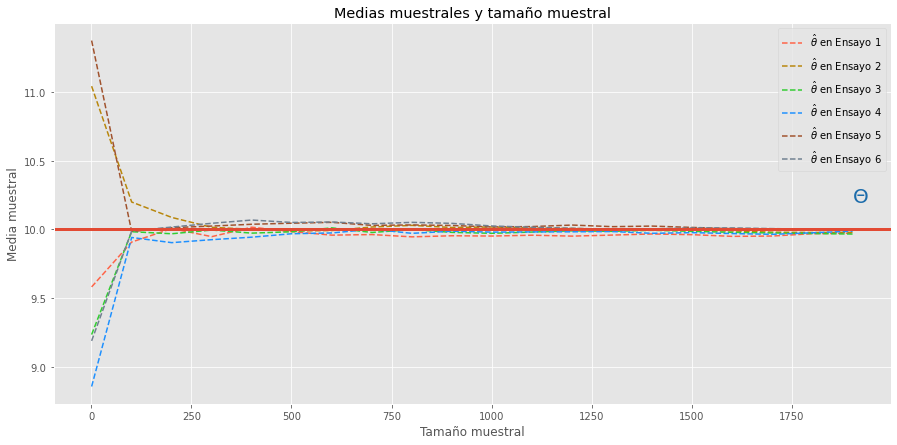

In [41]:
colores = ['tomato', 'darkgoldenrod', 'limegreen', 'dodgerblue', 'sienna', 'slategray']
plt.figure(figsize=(15, 7))
gfx.law_large_numbers(np.random.normal)

- En este ejemplo generamos una simulación de seis ensayos independientes siguiendo una distribución Poisson. 
- Como la función es una función genérica, denota al parámetro real $\Theta$, y al estimado $\hat \theta$.
- En el ejemplo sabemos de antemano que el valor verdadero de la cual surgen los ensayos es de $\lambda = 10$, señalado con la línea gruesa roja.
- Tomemos como punto de partida cuando el tamaño muestral es pequeño. Existen ensayos que $\hat \lambda$ (obtenido a partir del promedio de los datos generados de la distribución) sobreestima el valor verdadero de $\lambda$, y otras donde el valor es subestimado.
- En la medida que aumentamos el tamaño muestral de cada ensayo, la media muestral, el estimador $\hat \lambda$, tiende a acercarse a la esperanza del valor real, $\lambda$.

### Ejemplodistribución Gamma
Obtenido de <a href="https://medium.com/analytics-vidhya/illustration-with-python-weak-law-of-large-numbers-2a644b862985#:~:text=The%20weak%20law%20of%20large,close%20to%20an%20expected%20value">este artículo</a>.

sample with 100 sample size,mean:4.032332132414539, standard deviation: 0.30718995505398755
sample with 8100 sample size,mean:4.006637064591215, standard deviation: 0.03159070585352064


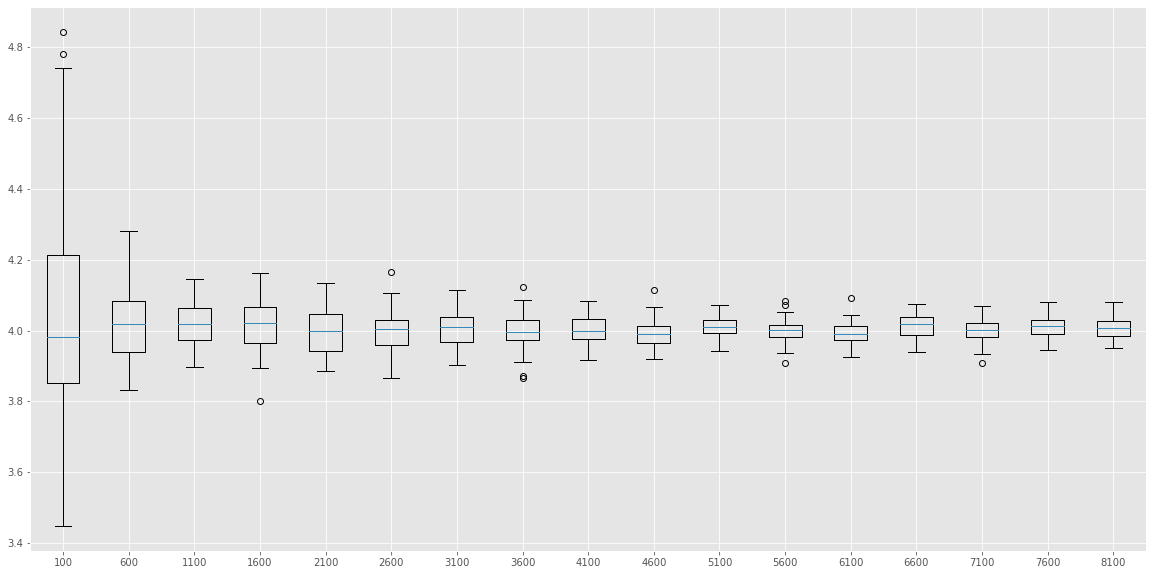

In [42]:
import random

k, theta = 2, 2  # La distribución gamma tiene 2 parámetros, k y theta
media_real = k * theta # La media de la distribución gamma, o su valor esperado, se obtiene con k * theta
s = np.random.gamma(k, theta, 1000000) # Genera una muestra aleatoria

sample_means = [] # lista para almacenar las medias
sample_sizes = range(100,8101,500) # lista de tamaños de muestras, valores entre 100 y 8100 cada 500
number_of_sample = 50 # muestra que toma de cada muestra

for i in sample_sizes:
    # Lista para medias en cada muestreo
    ml = []
    
    # De cada muestra i, obtiene 50 muestras y almacena la media
    for n in range(0, number_of_sample):
        # random pick from population with sample size = i
        rs = random.choices(s, k=i)
        # calculate the mean of each sample and save it in list of mean
        ml.append(sum(rs)/i)  
    
    # save the 50 sample mean in samplemeanlist for box plots
    sample_means.append(ml)
 
boxplots = plt.figure(figsize=(20,10))
plt.boxplot(sample_means, labels = sample_sizes)

print("sample with 100 sample size," + \
      "mean:" + str(np.mean(sample_means[0])) + \
      ", standard deviation: "+ str(np.std(sample_means[0])))
print("sample with 8100 sample size," + \
      "mean:" + str(np.mean(sample_means[16])) + \
      ", standard deviation: "+ str(np.std(sample_means[16])))

## Teorema del Límite Central

Si tenemos una secuencia de variables aleatorias independientes con media $\mu$ y varianza finita $\sigma$:
$$
\begin{align}
\frac{\bar X - \mu}{\frac{\sigma}{\sqrt{n}}}\xrightarrow[\text{}]{\text{d}} \mathcal{N}(0, 1)
\end{align}
$$
- $\xrightarrow[\text{}]{\text{d}}$: Convergencia a la distribución

- El Teorema del Límite Central es una piedra angular para la inferencia estadística. Nos permite relajar los supuestos sobre la distribución de nuestras variables.
- Postula que, _independientemente de la distribución de la variable_, la _suma_ y _media_ de las mediciones de cada variable _tiende a tener una distribución aproximadamente normal_. Ésta aproximación se ajusta a una campana gaussiana en la medida que más mediciones del evento son agregadas a la suma o media total.

Dado una variable aleatoria cualquiera, si iteramos $N$ veces en muestras de $n$ tamaño y calculamos sus promedio, se cumplirán los siguientes puntos:
- 1. La suma de dichos promedios tendrá una aproximación $\rightarrow \mathcal{N}$.
- 2. La desviación estándar de los promedios disminuirá por $n$.
- 3. $\theta$ y $\Theta$ convergirán en la medida que $n \rightarrow \infty$.

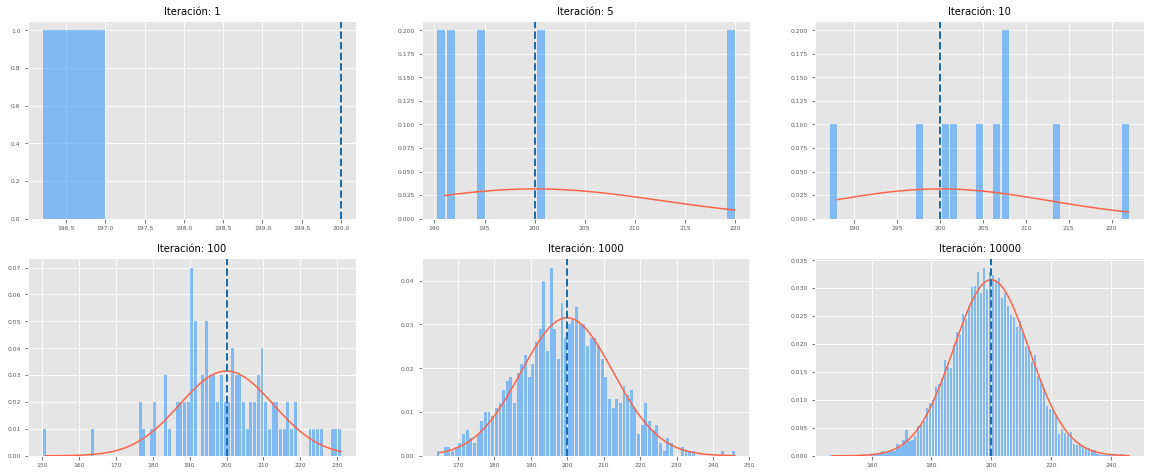

In [43]:
plt.figure(figsize=(20, 8))
gfx.central_limit_theorem()

- En estos gráficos se ilustra el efecto en la estimación de la media de una distribución binomial, con $p=0.2$, en la medida que se aumenta la muestra.
- Cada barra celeste es la media de una muestra.
- La línea vertical señala el _parámetro verdadero $p \cdot n$_ a contener, en este caso 200.
- La curva roja señala la distribución empírica de la muestra.

Si bien en las primeras iteraciones la muestra falla en capturar la distribución subyacente, cuando reunimos suficientes datos la suma de las medias de cada muestra tiende a la normalidad.